In [11]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols #ordinary least square method
from matplotlib import pyplot as plt

In [9]:
data = pd.read_excel('oneway.xlsx')

In [3]:
data

,Teaching Method1,Teaching Method2,Teaching Method3
0,4,2,2
1,3,4,1
2,2,6,3


In [ ]:
data_new = pd.melt(data.reset_index(),id_vars=['index'], value_vars=['Teaching Method1','Teaching Method2','Teaching Method3'])
data_new.columns=['index', 'Treatments', 'Value']
data_new
#melt to flatten the table
#reset index will reset whatever pre-existing index is there
#idvars will make uqiue id coumn
#value vars make the attributes columns

,index,Treatments,Value
0,0,Teaching Method1,4
1,1,Teaching Method1,3
2,2,Teaching Method1,2
3,0,Teaching Method2,2
4,1,Teaching Method2,4
5,2,Teaching Method2,6
6,0,Teaching Method3,2
7,1,Teaching Method3,1
8,2,Teaching Method3,3


In [5]:
model = ols('Value ~ C(Treatments)', data = data_new).fit()

In [22]:
anova_table = sm.stats.anova_lm(model, type =1)

In [23]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),2.0,6.0,3.0,1.5,0.296296
Residual,6.0,12.0,2.0,NaN,NaN


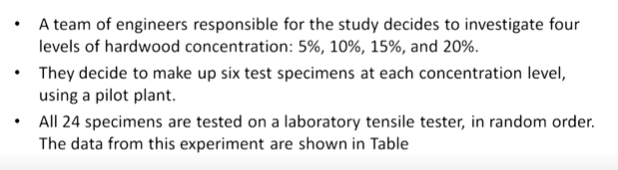

![Alt text](image.png)

<function matplotlib.pyplot.show(close=None, block=None)>

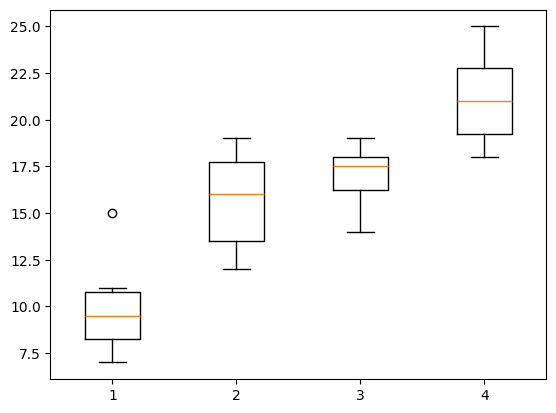

In [6]:
#first we plot use box-whisker plot
fivepercent = [7, 8, 15, 11, 9, 10]
tenpercent = [12, 17, 13, 18, 19, 15]
fifteenpercent = [14, 18, 19, 17, 16, 18]
twentypercent = [19, 25, 22, 23, 18, 20]

box_plot_data=[fivepercent,tenpercent, fifteenpercent, twentypercent]
plt.boxplot(box_plot_data)
plt.show

In [7]:
scipy.stats.f_oneway(fivepercent, tenpercent, fifteenpercent, twentypercent)

F_onewayResult(statistic=np.float64(19.605206999573184), pvalue=np.float64(3.5925782584743027e-06))

In [12]:
df = pd.read_excel("./Tensile strength of paper.xlsx")
df

,hardwood concentration 5%,hardwood concentration 10%,hardwood concentration 15%,hardwood concentration 20%
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [13]:
dfnew=pd.melt(df.reset_index(), id_vars=['index'],value_vars=['hardwood concentration 5%','hardwood concentration 10%','hardwood concentration 15%', 'hardwood concentration 20%'])
dfnew.columns=['Index', 'Treatments', 'Values']
dfnew

,Index,Treatments,Values
0,0,hardwood concentration 5%,7
1,1,hardwood concentration 5%,8
2,2,hardwood concentration 5%,15
3,3,hardwood concentration 5%,11
4,4,hardwood concentration 5%,9
5,5,hardwood concentration 5%,10
6,0,hardwood concentration 10%,12
7,1,hardwood concentration 10%,17
8,2,hardwood concentration 10%,13
9,3,hardwood concentration 10%,18


In [14]:
model=ols("Values ~ C(Treatments)",data=dfnew).fit()
anova_t=sm.stats.anova_lm(model, type=1)
anova_t

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


## LSD - Least significant Difference
The least different that if exceeded by the difference in pair's means, means that the pair means are different

In [15]:
t= -1 * scipy.stats.t.ppf(0.025, 20) #t value should be positive
n=6 # number of obs
MSE=6.50
lsd=t*math.sqrt(2*MSE/n)
print(lsd)

3.070455057025458


## Tukey's test (Post Hoc Analysis)

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(dfnew['Values'], dfnew['Treatments'])
mcresult = mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
hardwood concentration 10%,hardwood concentration 15%,1.3333,0.8022,-2.7892,5.4559,False
hardwood concentration 10%,hardwood concentration 20%,5.5,0.0066,1.3774,9.6226,True
hardwood concentration 10%,hardwood concentration 5%,-5.6667,0.0051,-9.7892,-1.5441,True
hardwood concentration 15%,hardwood concentration 20%,4.1667,0.047,0.0441,8.2892,True
hardwood concentration 15%,hardwood concentration 5%,-7.0,0.0007,-11.1226,-2.8774,True
hardwood concentration 20%,hardwood concentration 5%,-11.1667,0.0,-15.2892,-7.0441,True


In [17]:
data1 = pd.read_excel("./cotton weight.xlsx")
data1

,cotwt.15,cotwt.20,cotwt.25,cotwt.30,cotwt.35
0,7,12,14,19,7
1,7,17,18,25,10
2,15,12,18,22,11
3,11,18,19,19,15
4,9,18,19,23,11


In [19]:
data2 = pd.melt(data1.reset_index(),id_vars=['index'], value_vars=['cotwt.15','cotwt.20','cotwt.25', 'cotwt.30', 'cotwt.35'])
data2.columns=['id', 'treatment', 'value']

mc1 = MultiComparison(data2['value'], data2['treatment'])
mcresults = mc.tukeyhsd(0.05)
mcresults.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
hardwood concentration 10%,hardwood concentration 15%,1.3333,0.8022,-2.7892,5.4559,False
hardwood concentration 10%,hardwood concentration 20%,5.5,0.0066,1.3774,9.6226,True
hardwood concentration 10%,hardwood concentration 5%,-5.6667,0.0051,-9.7892,-1.5441,True
hardwood concentration 15%,hardwood concentration 20%,4.1667,0.047,0.0441,8.2892,True
hardwood concentration 15%,hardwood concentration 5%,-7.0,0.0007,-11.1226,-2.8774,True
hardwood concentration 20%,hardwood concentration 5%,-11.1667,0.0,-15.2892,-7.0441,True
